In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import re

import matplotlib.pyplot as plt
from PIL import Image, ImageOps
warnings.filterwarnings("ignore")

# Create DataFrame

In [2]:
directory = 'DL_track_train'

df = pd.DataFrame(columns =['filename', 'data'])
dimDict={} # check if all photos are of same shape

for filename in os.listdir(directory):
    f = str(os.path.join(directory, filename))
    img = Image.open(f)
    data = np.array(img)
    if data.shape in dimDict:
        dimDict[data.shape] += 1
    else:
        dimDict[data.shape] = 1
    img.close()
    insert_data = {'filename':f, 'data':data.flatten()}
    df = df.append(insert_data, ignore_index=True)  
        
print(dimDict)

def extract_class(s):
    return re.search('label(.+?).png', s).group(1)

df['class'] = df['filename'].apply(extract_class)

df.head()

{(64, 64): 1653}


,filename,data,class
0,DL_track_train/image1050_label45.png,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",45
1,DL_track_train/image1110_label43.png,"[3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, ...",43
2,DL_track_train/image229_label16.png,"[40, 43, 49, 50, 54, 55, 61, 62, 67, 68, 72, 7...",16
3,DL_track_train/image933_label34.png,"[220, 220, 220, 220, 220, 220, 220, 219, 219, ...",34
4,DL_track_train/image601_label8.png,"[37, 36, 36, 37, 37, 34, 34, 33, 34, 33, 33, 3...",8


It seems like everything is 64x64 and is a rank 2 tensor (grayscale)

In [3]:
df['class'] = df['class'].astype(int)
print(f'classes range from 0 to {df["class"].nunique() - 1}')

classes range from 0 to 48


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=42)

train = pd.concat([train_X, train_y], axis=1)
val = pd.concat([val_X, val_y], axis=1)

# Quick EDA

(64, 64)

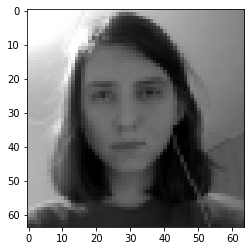

In [5]:
# Sample
plt.imshow(df['data'][0].reshape(64,64), cmap='gray')
data.shape

<AxesSubplot:xlabel='class', ylabel='count'>

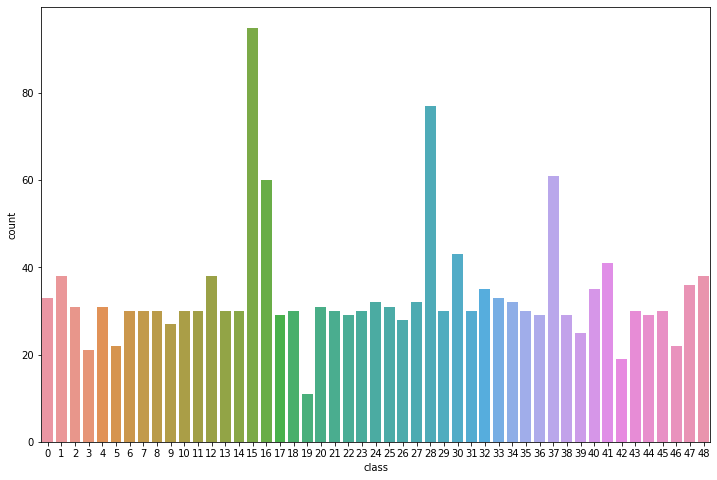

In [6]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.countplot(x='class', data=df, order=range(49))

Unsure what each classes mean, but we can still continue to try CNN.

# Create Directories for PyTorch ImageFolder

In [7]:
# make folder for validation set
root_path = '../DL Face Recognition'
dr = 'DL_track_val'
path = os.path.join(root_path, dr)
os.mkdir(path)

In [8]:
# make classes dir for train and val

classes = np.arange(49).astype(str)
train_path = '../DL Face Recognition/DL_track_train'
val_path = '../DL Face Recognition/DL_track_val'

for cl in classes:
    path = os.path.join(train_path, cl)
    os.mkdir(path)
    
    path = os.path.join(val_path, cl)
    os.mkdir(path)

In [9]:
# move files into respective folders
import shutil

train['class'] = train['class'].astype(str)
val['class'] = val['class'].astype(str)

for train_file in train['filename']:
    shutil.move(train_file, train_path+'/'+train.loc[train['filename']==train_file, 'class'].iloc[0])
    
for val_file in val['filename']:
    shutil.move(val_file, val_path+'/'+val.loc[val['filename']==val_file, 'class'].iloc[0])